In [1]:
import pandas as pd
import random

In [2]:
constant_source = pd.read_pickle("00 Constant 500.pkl")
dynamic_source = pd.read_pickle("00 Dynamic 500.pkl")


In [22]:
dynamic_source

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
2019-01-01 00:00:00+00:00,0.293175,0.110863,0.242105,0.099929,0.201389,0.118155,0.144105,NaN,0.154369,NaN,...,0.087797,NaN,0.303019,NaN,0.118346,0.360927,NaN,0.244014,NaN,0.222116
2019-01-01 01:00:00+00:00,0.2515,0.10947,0.31748,0.064124,0.1171,0.253998,0.146254,NaN,0.099125,NaN,...,0.096889,NaN,1.430308,NaN,0.12417,0.24325,NaN,1.715802,NaN,0.366854
2019-01-01 02:00:00+00:00,1.299915,0.456832,2.472449,2.114611,1.133525,0.142115,0.165683,NaN,0.261773,NaN,...,2.35855,NaN,1.855911,NaN,0.145369,2.262508,NaN,2.794416,NaN,0.142355
2019-01-01 03:00:00+00:00,0.60265,0.854489,2.685122,1.148432,0.257812,0.276227,0.142298,NaN,1.675463,NaN,...,2.335557,NaN,2.439191,NaN,0.487995,2.56103,NaN,2.413323,NaN,0.15724
2019-01-01 04:00:00+00:00,2.447822,1.32868,2.347563,1.965944,0.432872,0.689122,2.615476,NaN,2.830204,NaN,...,3.565542,NaN,2.849121,NaN,2.183955,2.431022,NaN,2.80452,NaN,2.249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 19:00:00+00:00,0.0,0.0,0.196597,0.0,-0.0,0.001528,-0.0,NaN,0.0,NaN,...,0.0,NaN,0.228844,NaN,0.0,0.175766,NaN,6.232353,NaN,0.0
2019-12-31 20:00:00+00:00,0.962058,0.713401,1.204339,0.118284,0.818041,0.203691,0.699593,NaN,0.520015,NaN,...,0.654635,NaN,0.366666,NaN,0.63031,0.654658,NaN,6.346934,NaN,0.801307
2019-12-31 21:00:00+00:00,0.817888,0.267139,2.192372,0.151018,1.107142,0.157145,0.685236,NaN,0.108642,NaN,...,0.683141,NaN,1.483489,NaN,1.034046,0.596205,NaN,6.601347,NaN,1.633021
2019-12-31 22:00:00+00:00,0.203231,0.109425,1.234458,0.0,0.151707,0.18942,0.0,NaN,0.116053,NaN,...,0.0,NaN,0.216933,NaN,0.612188,0.546506,NaN,6.193015,NaN,0.140753


In [25]:

df_price = pd.read_excel("./Gro_handelspreise_202101010000_202112312359_Stunde (2).xlsx", skiprows=9)
df_p = pd.DataFrame()
df_p.index = constant_source.index
df_p["Deutschland/Luxemburg [€/kWh]"] = df_price["Deutschland/Luxemburg [€/MWh]"].apply(lambda x: x/1000).values
min_price = df_p["Deutschland/Luxemburg [€/kWh]"].min()
df_p["Deutschland/Luxemburg [€/kWh]"] = df_p["Deutschland/Luxemburg [€/kWh]"].apply(lambda x: x+abs(min_price)) # avoid negative values for optimization
df_p.head()

In [14]:
constant_costs = constant_source.mul(df_p['Deutschland/Luxemburg [€/kWh]'], axis=0)
dynamic_costs = dynamic_source.mul(df_p['Deutschland/Luxemburg [€/kWh]'], axis=0)

compare_means = pd.DataFrame()
compare_means["Mean Constant Costs"] = constant_costs.mean(axis=1)
compare_means["Mean Dynamic Costs"] = dynamic_costs.mean(axis=1)


<AxesSubplot: >

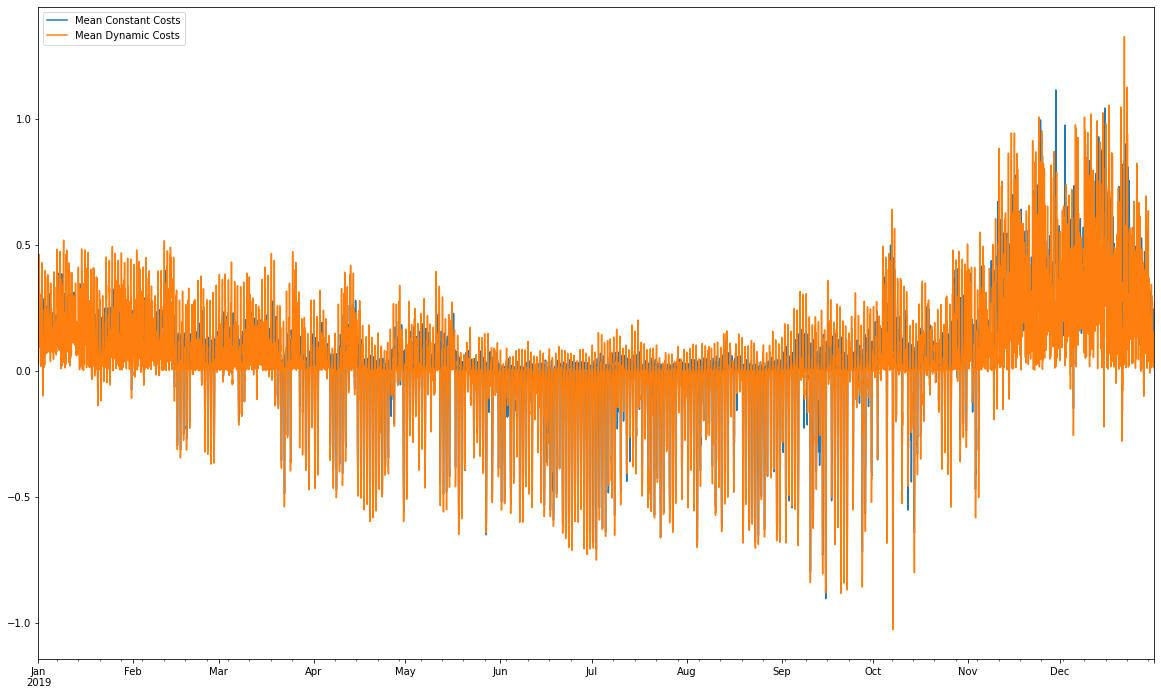

In [16]:
compare_means.plot(figsize=(20,12))